#1.Import libraries
---


In [ ]:
import scipy as sp
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters

register_matplotlib_converters()
import seaborn as sns

#Read data
---


In [ ]:
from google.colab import files
import io
uploaded = files.upload()

Saving data.csv to data.csv


In [ ]:
df=pd.read_csv(io.BytesIO(uploaded['data.csv']))

df

,X,Y,theta1,theta2,theta3,theta4,theta1_e,theta2_e,theta3_e,theta4_e
0,3.000000,2.500000,3.836331,2.245537,-2.245537,-0.694738,3.845448,2.453942,-2.220741,-0.639323
1,2.999841,2.512615,3.838834,2.243122,-2.248045,-0.692277,3.395462,2.205252,-2.255851,-0.685170
2,2.999363,2.525223,3.841377,2.240801,-2.250645,-0.689860,3.910299,1.898638,-1.997244,-0.479106
3,2.998568,2.537814,3.843959,2.238574,-2.253335,-0.687487,4.002705,2.050866,-2.381635,-0.828333
4,2.997455,2.550382,3.846579,2.236444,-2.256113,-0.685161,3.576105,2.218033,-2.442707,-0.718017
...,...,...,...,...,...,...,...,...,...,...
4745,8.469462,1.895420,3.361759,0.500010,-0.729952,-0.351352,3.138078,0.383303,-0.738149,-0.207522
4746,8.482816,2.046228,3.378291,0.531193,-0.703389,-0.335076,3.445084,0.357440,-0.838765,-0.539023
4747,8.492361,2.197324,3.394781,0.561600,-0.676273,-0.318768,3.524828,0.440419,-0.559795,-0.379389
4748,8.498090,2.348614,3.411232,0.591272,-0.648571,-0.302427,3.237491,0.629130,-0.445670,-0.455049


**Find number of rows and columns**

In [ ]:
df.shape

(4750, 10)

#2.Data pre-processing
---
Now we are going to preprocess the data. Indeed, we manipulate and drop of the data before it is used in order to ensure or enhance performance.

In [ ]:
#data description
df.describe()

,X,Y,theta1,theta2,theta3,theta4,theta1_e,theta2_e,theta3_e,theta4_e
count,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000,4750.000000
mean,2.511789,2.500000,3.843224,1.489913,-1.489913,-0.701632,3.849086,1.490904,-1.490651,-0.705257
std,2.397969,2.384680,0.897446,1.720658,1.720658,0.897446,0.912745,1.731927,1.728104,0.912555
min,-3.499522,-3.499881,0.013826,-3.138452,-3.141561,-3.140647,-0.182278,-3.437875,-3.434046,-3.352504
25%,1.092174,1.087282,3.500066,1.413531,-2.496907,-1.132498,3.471101,1.408166,-2.508713,-1.178436
50%,2.515771,2.500000,3.905973,2.171464,-2.171464,-0.764381,3.909016,2.149407,-2.155534,-0.767629
75%,3.933640,3.912718,4.274090,2.496907,-1.413531,-0.358473,4.331334,2.523762,-1.399921,-0.340384
max,8.500000,8.499881,6.282239,3.141561,3.138452,3.127766,6.696890,3.541097,3.504782,3.354920


In [ ]:
#Number of missing values per coloumn
df.isna().sum()

X           0
Y           0
theta1      0
theta2      0
theta3      0
theta4      0
theta1_e    0
theta2_e    0
theta3_e    0
theta4_e    0
dtype: int64

The correlation DataFrame is:


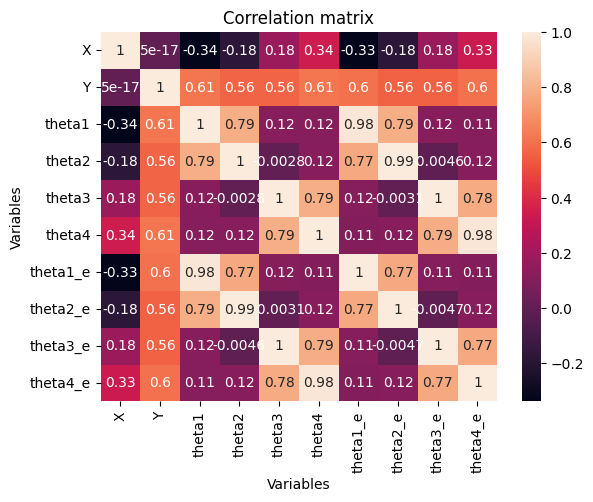

In [ ]:
corr_df = df.corr()
print("The correlation DataFrame is:")
fig, ax = plt.subplots()

# Création d'une carte de chaleur avec seaborn
heatmap = sns.heatmap(corr_df, annot=True)

# Paramètres esthétiques
ax.set_title('Correlation matrix')
ax.set_xlabel('Variables')
ax.set_ylabel('Variables')

# Afficher la figure
plt.show()


#3. Extande Kalman Filtre
---


In [ ]:
def read_csv_to_list(DF,arg,n):
    data_list = DF[arg].values.reshape((n,1))
    return data_list
n=df.shape[0]
theta1=read_csv_to_list(df,"theta1",n)
theta2=read_csv_to_list(df,"theta2",n)
theta3=read_csv_to_list(df,"theta3",n)
theta4=read_csv_to_list(df,"theta4",n)
x=read_csv_to_list(df,"X",n)
y=read_csv_to_list(df,"Y",n)


**Angulation function**

**Inverse angulation function**

**Initialization**


#4.Data visualization
---


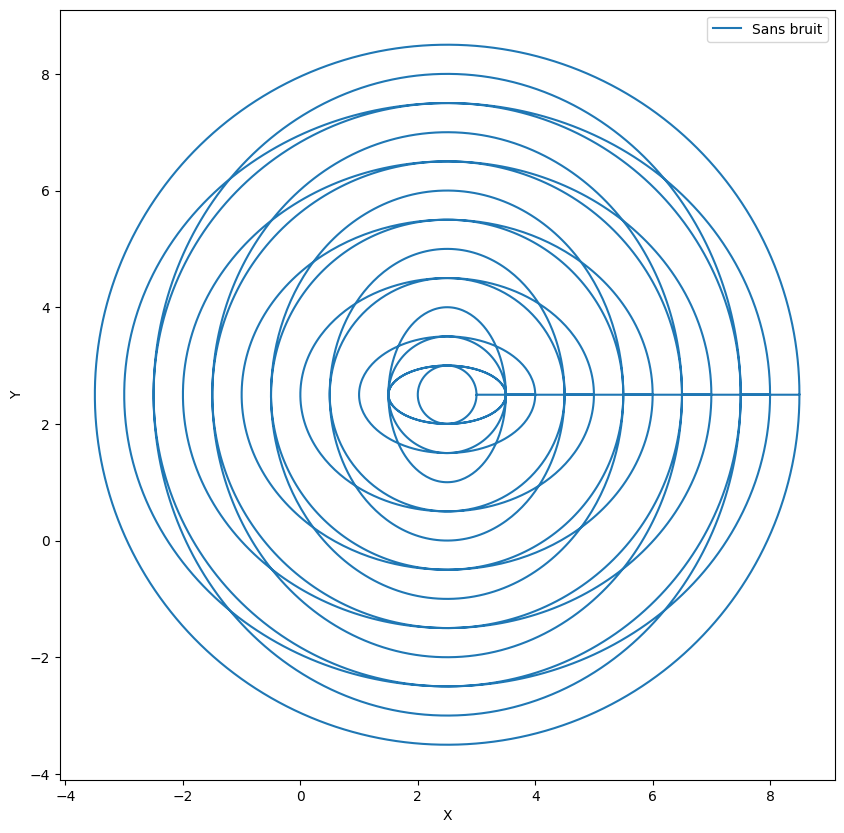

In [ ]:
dt=0.01
t=np.linspace(0,(n-1)*dt,n)
fig2=plt.figure(figsize=(10,10))




plt.plot(x,y,label="Sans bruit")

plt.xlabel("X")
plt.ylabel('Y')
plt.legend()

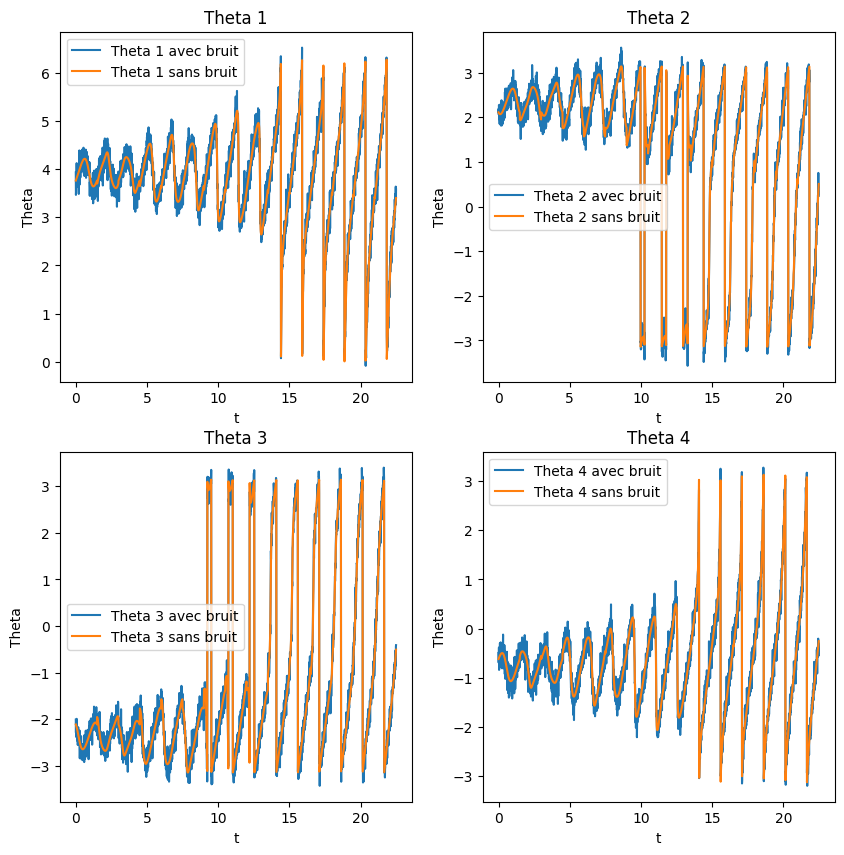

In [ ]:
fig3=plt.figure(figsize=(10,10))
angles_e =[theta1_e, theta2_e, theta3_e, theta4_e]
angles=[theta1, theta2, theta3, theta4]

for i in range(4) :

  ax31 = fig3.add_subplot(2, 2, i+1)
  ax31.plot(t,angles_e[i],label=f"Theta {i+1} avec bruit")
  ax31.plot(t,angles[i],label=f"Theta {i+1} sans bruit")
  ax31.set_ylabel("Theta")
  ax31.set_xlabel("t")
  ax31.set_title(f"Theta {i+1}")
  ax31.legend()
  "===============================3======================================"

In [ ]:
def create_dataset (df):
    Xs, ys = [], []
    for i in range(df.shape[0]):
        v = (df.loc[i, ['theta1_e', 'theta2_e','theta3_e','theta4_e']].values).tolist()
        #v1=(df.loc[i,  ['theta1', 'theta2','theta3','theta4']].values).tolist()
        v1=(df.loc[i,  ["X","Y"]].values).tolist()
        Xs.append(v)
        ys.append(v1)

    return np.array(Xs), np.array(ys)

X,Y= create_dataset(df)
Y[:6]

array([[3.5       , 2.5       ],
       [3.49911102, 2.54215653],
       [3.49644565, 2.58423811],
       [3.49200864, 2.62616992],
       [3.48580788, 2.6678774 ],
       [3.47785439, 2.7092864 ]])

In [ ]:
'''
# Print data shape
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape) '''


"\n# Print data shape\nprint('X_train.shape: ', X_train.shape)\nprint('y_train.shape: ', y_train.shape)\nprint('X_test.shape: ', X_test.shape)\nprint('y_test.shape: ', y_test.shape) "

#**5. Model training**
---
##**5.1. First approach**
In our first approach, we plan to use a convolutional neural network (CNN) to construct a model that directly determines the position of the tag without filtering the inputs. The objective is to determine a function that considers the noisy inputs in order to achieve accurate localization.

***Model building***

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers

# Préparation des données
X_train, X_test, y_train, y_test = X, X, Y, Y

# Construction du modèle CNN
model = tf.keras.Sequential()
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(4, 1)))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Reshape((128,1)))
model.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(128,1)))
model.add(layers.MaxPooling1D(pool_size=4))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2))


model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 2, 64)             256       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 1, 64)            0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 64)                0         
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 128)               8320      
                                                                 
 reshape (Reshape)           (None, 128, 1)            0         
                                                        

***Compilation du modèle***

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

***Entraînement du modèle***

In [ ]:
model.fit(X_train, y_train, epochs=250, batch_size=15)

Epoch 1/250
150/150 [==============================] - 2s 6ms/step - loss: 4.3762
Epoch 2/250
150/150 [==============================] - 1s 4ms/step - loss: 0.8391
Epoch 3/250
150/150 [==============================] - 1s 4ms/step - loss: 0.6105
Epoch 4/250
150/150 [==============================] - 1s 4ms/step - loss: 0.5584
Epoch 5/250
150/150 [==============================] - 1s 4ms/step - loss: 0.5154
Epoch 6/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4769
Epoch 7/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4435
Epoch 8/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4252
Epoch 9/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4238
Epoch 10/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4404
Epoch 11/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4370
Epoch 12/250
150/150 [==============================] - 1s 4ms/step - loss: 0.4172
Epoch 13/250


***Save model***

In [ ]:
model.save('saved_model_hforma/positionning_model4.h5')

***Prediction***

In [ ]:
predictions = model.predict(X)
X_CNN,Y_CNN=predictions[:,0],predictions[:,1]

71/71 [==============================] - 0s 2ms/step


### ***Presentation of results and conclusion***

'=====================================3=========================================================='

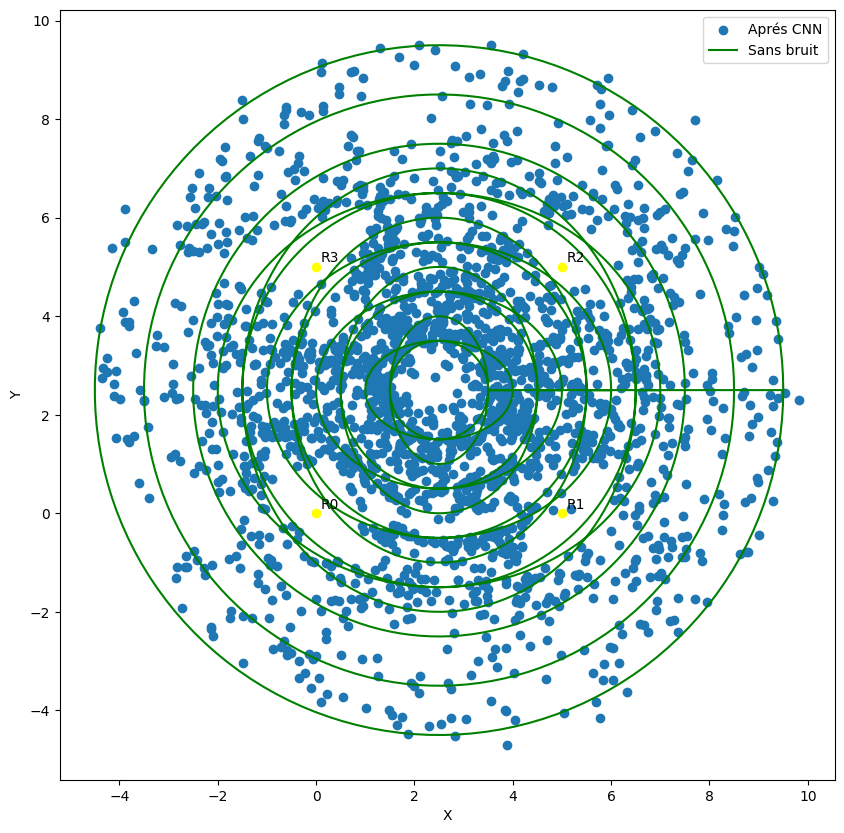

In [ ]:
fig2=plt.figure(figsize=(10,10))



plt.scatter(X_CNN,Y_CNN, label="Aprés CNN")
#plt.scatter(X_EKF,Y_EKF,c="red", label="san filtrage")
plt.plot(x,y,c="green",label="Sans bruit")
for i in range(len(ref_points)):

        x_i, y_i = ref_points[i]
        plt.scatter(x_i,y_i,c="yellow")
        plt.annotate(f'R{i}', (x_i+0.1, y_i+0.1))
plt.xlabel("X")
plt.ylabel('Y')

plt.legend()
"=====================================3=========================================================="

'=====================================3=========================================================='

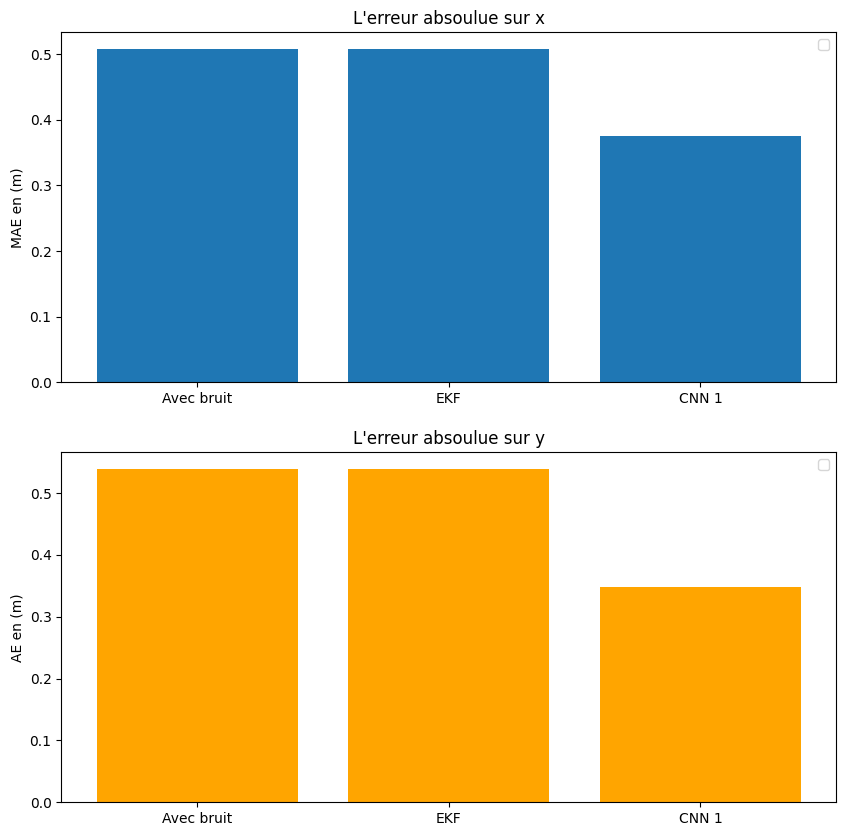

In [ ]:
Label=["Avec bruit","EKF","CNN 1"]

X_CNN=X_CNN.reshape((n,1))
Y_CNN=Y_CNN.reshape((n,1))
X_EKF=np.array(X_EKF).reshape((n,1))
Y_EKF=np.array(Y_EKF).reshape((n,1))
X_erreur=np.array(X_erreur).reshape((n,1))
Y_erreur=np.array(Y_erreur).reshape((n,1))
x=np.array(x).reshape((n,1))
y=np.array(y).reshape((n,1))

x_AE_CNN=np.average(np.abs(x-X_CNN))
x_AE_EKF=np.average(np.abs(x-X_EKF))
x_AE_erreur=np.average(np.abs(x-X_erreur))
AE_x=[x_AE_erreur, x_AE_EKF, x_AE_CNN]

y_AE_CNN=np.average(np.abs(y-Y_CNN))
y_AE_EKF=np.average(np.abs(y-Y_EKF))
y_AE_erreur=np.average(np.abs(y-Y_erreur))
AE_y=[y_AE_erreur, y_AE_EKF, y_AE_CNN]


fig_error=plt.figure(figsize=(10,10))
ax31 = fig_error.add_subplot(2, 1, 1)
ax31.bar(Label,AE_x)


ax31.set_ylabel('AE')
ax31.set_title("L'erreur absoulue sur x")
ax31.set_ylabel("MAE en (m)")
ax31.legend()

ax32 = fig_error.add_subplot(2, 1, 2)
ax32.bar(Label,AE_y , color="orange")


ax32.set_ylabel("AE en (m)")
ax32.set_title("L'erreur absoulue sur y")
ax32.legend()
"=====================================3=========================================================="

In [ ]:
Xs= []
for i in range(df.shape[0]):
            v1=(df.loc[i,  ['theta1', 'theta2','theta3','theta4']].values).tolist()
            Xs.append(v1)

Xs=np.array(Xs)
Xs

array([[ 3.76184214,  2.11121583, -2.11121583, -0.62024949],
       [ 3.76989315,  2.10412703, -2.11901197, -0.61234788],
       [ 3.77808399,  2.09773887, -2.12751906, -0.60460552],
       ...,
       [ 3.34054132,  0.40346084, -0.6042606 , -0.3152103 ],
       [ 3.3697944 ,  0.4561455 , -0.5564337 , -0.28632368],
       [ 3.39891637,  0.5070985 , -0.5070985 , -0.25732371]])

In [ ]:
angles_CNN_filter=[]
for i in range(n) :

    x_point=float(X_CNN[i])
    y_point=float(Y_CNN[i])
    angle = inv_Triangulation(ref_points, x_point, y_point)

    angles_CNN_filter.append(angle)
angles_CNN_filter_array=np.array(angles_CNN_filter)

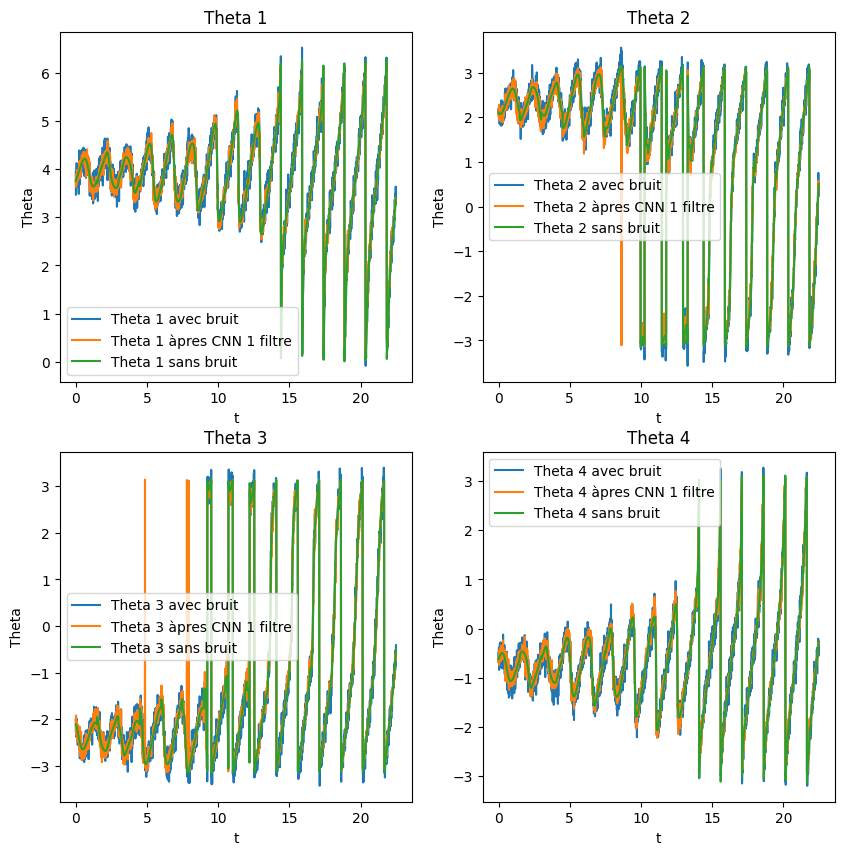

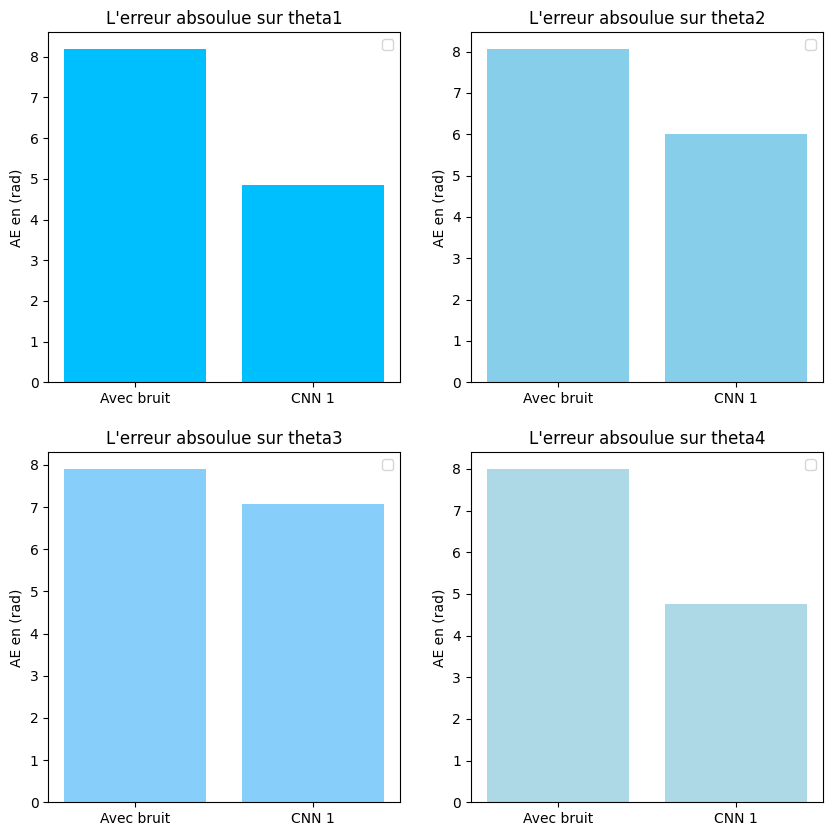

In [ ]:
fig3=plt.figure(figsize=(10,10))
fig_error=plt.figure(figsize=(10,10))
angles_e=[theta1_e, theta2_e, theta3_e, theta4_e]
angles=[theta1, theta2, theta3, theta4]
Label=[ "Avec bruit", "CNN 1"]
color=["deepskyblue","skyblue", "lightskyblue", "lightblue"]

for i in range(4) :

  ax31 = fig3.add_subplot(2, 2, i+1)
  ax31.plot(t,angles_e[i],label=f"Theta {i+1} avec bruit")
  ax31.plot(t,angles_CNN_filter_array[:,i],label=f"Theta {i+1} àpres CNN 1 filtre")
  ax31.plot(t,angles[i],label=f"Theta {i+1} sans bruit")
  ax31.set_ylabel("Theta")
  ax31.set_xlabel("t")
  ax31.set_title(f"Theta {i+1}")
  ax31.legend()

  theta_AE_CNN=np.average(np.abs(np.rad2deg(angles[i]-angles_CNN_filter_array[:,i].reshape((n,1)))))
  theta_AE_erreur=np.average(np.abs(np.rad2deg(angles[i]-angles_e[i])))
  theta1_AE=[theta_AE_erreur, theta_AE_CNN]


  ax31 = fig_error.add_subplot(2, 2, i+1)
  ax31.bar(Label,theta1_AE,color=color[i])
  ax31.set_title("L'erreur absoulue sur theta"+str(i+1))
  ax31.set_ylabel("AE en (rad)")
  ax31.legend()

  "======================2====================================="

In [ ]:
def create_dataset (df):
    Xs, ys = [], []
    for i in range(df.shape[0]):
        v = (df.loc[i, ['theta1_e', 'theta2_e','theta3_e','theta4_e']].values).tolist()
        v1=(df.loc[i,  ['theta1', 'theta2','theta3','theta4']].values).tolist()
        Xs.append(v)
        ys.append(v1)

    return np.array(Xs), np.array(ys)

X,Y= create_dataset(df)
Y[:6]

array([[ 3.76184214,  2.11121583, -2.11121583, -0.62024949],
       [ 3.76989315,  2.10412703, -2.11901197, -0.61234788],
       [ 3.77808399,  2.09773887, -2.12751906, -0.60460552],
       [ 3.78640535,  2.09204195, -2.13673724, -0.59703256],
       [ 3.79484819,  2.08702457, -2.14666268, -0.58963946],
       [ 3.80340368,  2.0826731 , -2.15728726, -0.58243702]])

In [ ]:
# Préparation des données
s=int(X.shape[0]/5)
a=X.shape[0]-s
X_train, X_test, y_train, y_test = X, X, Y, Y

# Construction du modèle CNN
model2= tf.keras.Sequential()
model2.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(4, 1)))
model2.add(layers.MaxPooling1D(pool_size=2))
model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Reshape((128,1)))
model2.add(layers.Conv1D(64, kernel_size=3, activation='relu', input_shape=(128,1)))
model2.add(layers.MaxPooling1D(pool_size=4))
model2.add(layers.Flatten())
model2.add(layers.Dense(128, activation='relu'))
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dense(4))


model2.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_2 (Conv1D)           (None, 2, 64)             256       
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 1, 64)            0         
 1D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 64)                0         
                                                                 
 dense_5 (Dense)             (None, 64)                4160      
                                                                 
 dense_6 (Dense)             (None, 128)               8320      
                                                                 
 reshape_1 (Reshape)         (None, 128, 1)            0         
                                                      

In [ ]:
# Compilation du modèle
model2.compile(loss='mean_squared_error', optimizer='adam')

In [ ]:
# Entraînement du modèle
model2.fit(X_train, y_train, epochs=500, batch_size=5)

Epoch 1/500
450/450 [==============================] - 2s 3ms/step - loss: 0.2952
Epoch 2/500
450/450 [==============================] - 1s 3ms/step - loss: 0.0469
Epoch 3/500
450/450 [==============================] - 1s 3ms/step - loss: 0.0364
Epoch 4/500
450/450 [==============================] - 2s 3ms/step - loss: 0.0360
Epoch 5/500
450/450 [==============================] - 2s 5ms/step - loss: 0.0376
Epoch 6/500
450/450 [==============================] - 2s 3ms/step - loss: 0.0303
Epoch 7/500
450/450 [==============================] - 2s 3ms/step - loss: 0.0309
Epoch 8/500
450/450 [==============================] - 2s 3ms/step - loss: 0.0316
Epoch 9/500
450/450 [==============================] - 1s 3ms/step - loss: 0.0329
Epoch 10/500
450/450 [==============================] - 2s 3ms/step - loss: 0.0328
Epoch 11/500
450/450 [==============================] - 1s 3ms/step - loss: 0.0317
Epoch 12/500
450/450 [==============================] - 2s 4ms/step - loss: 0.0288
Epoch 13/500


In [ ]:
model2.save('saved_model_hforma/filter_model6.h5')

In [ ]:
predictions = model2.predict(X)
theta1_CNN2, theta2_CNN2, theta3_CNN2, theta4_CNN2=predictions[:,0], predictions[:,1], predictions[:,2], predictions[:,3]

71/71 [==============================] - 0s 2ms/step


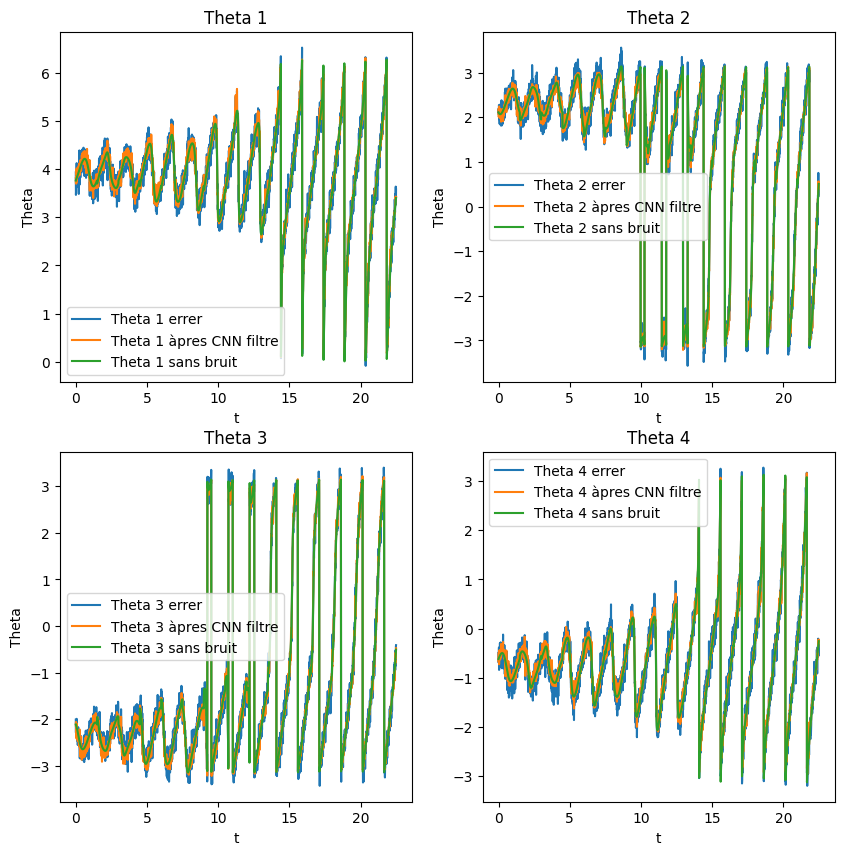

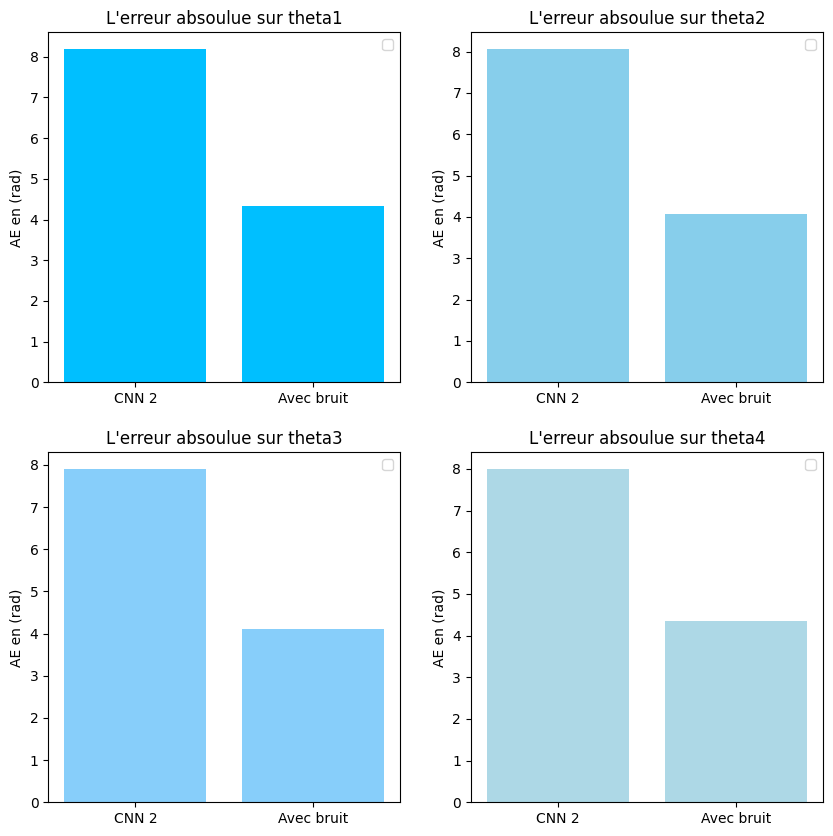

In [ ]:
fig3=plt.figure(figsize=(10,10))
fig_error=plt.figure(figsize=(10,10))
angles_CNN =[theta1_CNN2, theta2_CNN2, theta3_CNN2, theta4_CNN2]
angles_e=[theta1_e, theta2_e, theta3_e, theta4_e]
angles=[theta1, theta2, theta3, theta4]
color=["deepskyblue","skyblue", "lightskyblue", "lightblue"]
Label=["CNN 2", "Avec bruit"]

for i in range(len(angles)) :

  ax31 = fig3.add_subplot(2, 2, i+1)
  ax31.plot(t,angles_e[i],label=f"Theta {i+1} errer")
  ax31.plot(t,angles_CNN[i],label=f"Theta {i+1} àpres CNN filtre")
  ax31.plot(t,angles[i],label=f"Theta {i+1} sans bruit")
  ax31.set_ylabel("Theta")
  ax31.set_xlabel("t")
  ax31.set_title(f"Theta {i+1}")
  ax31.legend()

  theta_AE_CNN=np.average(np.abs(np.rad2deg(angles[i]-angles_CNN[i].reshape((n,1)))))
  theta_AE_erreur=np.average(np.abs(np.rad2deg(angles[i]-angles_e[i])))
  theta1_AE=[theta_AE_erreur, theta_AE_CNN]

  ax31 = fig_error.add_subplot(2, 2, i+1)
  ax31.bar(Label,theta1_AE , color=color[i])
  ax31.set_title("L'erreur absoulue sur theta"+str(i+1))
  ax31.set_ylabel("AE en (rad)")
  ax31.legend()


In [ ]:
X_CNN2=[]
Y_CNN2=[]
ref_points = [(0, 0), (5, 0), (5,5), (0,5)]
for i in range(n):
    angle=[float(theta1_CNN2[i]),
           float(theta2_CNN2[i]),
           float(theta3_CNN2[i]),
           float(theta4_CNN2[i])
           ]
    x_valeur,y_valeur=Triangulation(angle,ref_points)
    X_CNN2.append(x_valeur)
    Y_CNN2.append(y_valeur)

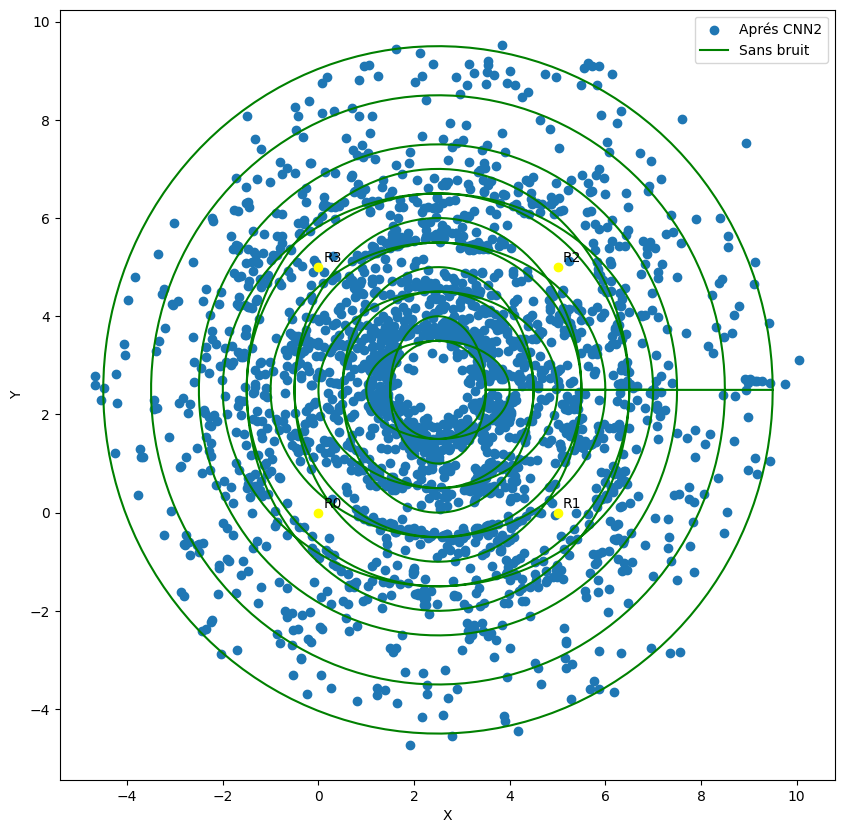

In [ ]:
fig2=plt.figure(figsize=(10,10))



plt.scatter(X_CNN2,Y_CNN2, label="Aprés CNN2")
#plt.scatter(X_EKF,Y_EKF,c="red", label="san filtrage")
plt.plot(x,y,c="green",label="Sans bruit")
for i in range(len(ref_points)):

        x_i, y_i = ref_points[i]
        plt.scatter(x_i,y_i,c="yellow")
        plt.annotate(f'R{i}', (x_i+0.1, y_i+0.1))
plt.xlabel("X")
plt.ylabel('Y')

plt.legend()

'=====================================3=========================================================='

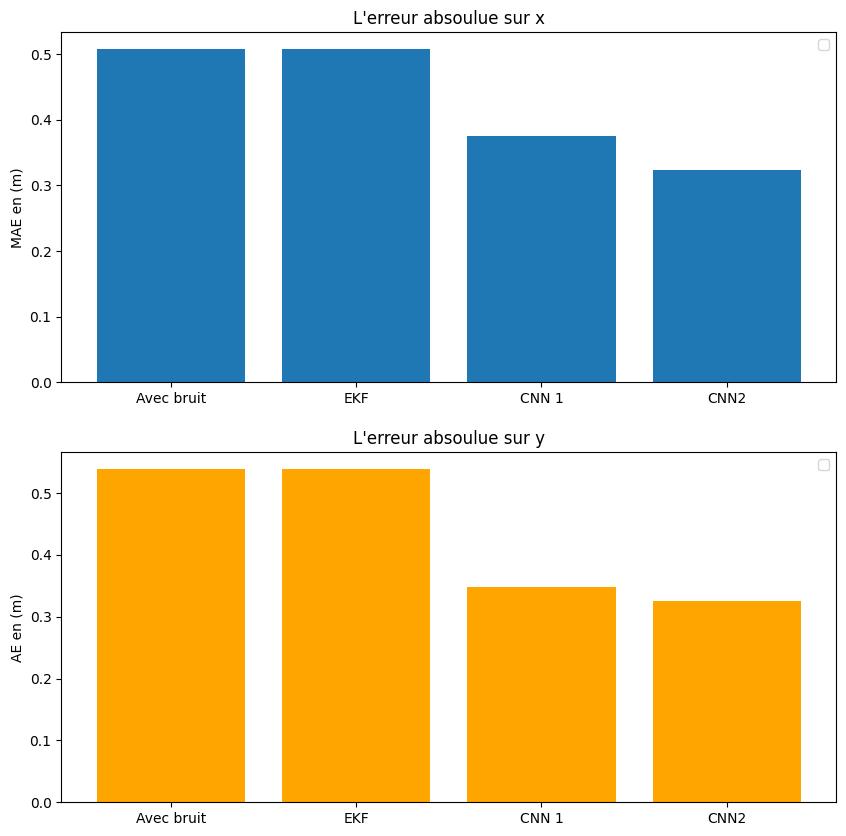

In [ ]:
Label=["Avec bruit","EKF","CNN 1" , "CNN2"]

X_CNN=X_CNN.reshape((n,1))
X_CNN2=np.array(X_CNN2).reshape((n,1))
Y_CNN=Y_CNN.reshape((n,1))
Y_CNN2=np.array(Y_CNN2).reshape((n,1))
X_EKF=np.array(X_EKF).reshape((n,1))
Y_EKF=np.array(Y_EKF).reshape((n,1))
X_erreur=np.array(X_erreur).reshape((n,1))
Y_erreur=np.array(Y_erreur).reshape((n,1))
x=np.array(x).reshape((n,1))
y=np.array(y).reshape((n,1))

x_AE_CNN=np.average(np.abs(x-X_CNN))
x_AE_CNN2=np.average(np.abs(x-X_CNN2))
x_AE_CNN=np.average(np.abs(x-X_CNN))
x_AE_EKF=np.average(np.abs(x-X_EKF))
x_AE_erreur=np.average(np.abs(x-X_erreur))
AE_x=[x_AE_erreur, x_AE_EKF, x_AE_CNN , x_AE_CNN2]

y_AE_CNN=np.average(np.abs(y-Y_CNN))
y_AE_CNN2=np.average(np.abs(y-Y_CNN2))
y_AE_EKF=np.average(np.abs(y-Y_EKF))
y_AE_erreur=np.average(np.abs(y-Y_erreur))
AE_y=[y_AE_erreur, y_AE_EKF, y_AE_CNN, y_AE_CNN2]


fig_error=plt.figure(figsize=(10,10))
ax31 = fig_error.add_subplot(2, 1, 1)
ax31.bar(Label,AE_x)


ax31.set_ylabel('AE')
ax31.set_title("L'erreur absoulue sur x")
ax31.set_ylabel("MAE en (m)")
ax31.legend()

ax32 = fig_error.add_subplot(2, 1, 2)
ax32.bar(Label,AE_y , color="orange")


ax32.set_ylabel("AE en (m)")
ax32.set_title("L'erreur absoulue sur y")
ax32.legend()
"=====================================3=========================================================="